# EECS 3401 Final Project 
Authors: Paul Dumitriu, Alex Phan, Sahajdeep Singh

### Feature summary
Summary of all the features in this dataset:

1. **work_year:** The year the salary was paid.

2. **experience_level:** The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

3. **employment_type:** The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance

4. **salary:** The total gross salary amount paid.

5. **salary_currency:** The currency of the salary paid as an ISO 4217 currency code.

6. **salary_in_usd:** The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

7. **employee_residence:** Employee's primary country of residence in during the work year as an ISO 3166 country code.

8. **remote_ratio:** The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

9. **company_location:** The country of the employer's main office or contracting branch as an ISO 3166 country code.

10. **company_size:** The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

## Look at the Big Picture and Frame the Problem

#### Frame the Problem
1. Supervised Learning: Data is labeled
2. Regression Task: We are predicting a numerical value (Salary of data scientist in USD)
3. Batch Learning:
    - Small dataset
    - No need to add new instances to data
#### Look at the Big Picture
Taking a look at the bigger picture, the business objective of this project is to assist data science companies such as NVIDIA, IBM, OpenText, and more to be able to budget their data scientists more accurately compared to the average salary amount a data scientist should be earning depending on many factors including work year, experience level, and specific field of data science. Companies should expect to use our project and benefit from it by being able to predict how much their employees should be making and how much they might make in the future if they keep the same position down the line. This will help companies with budgeting there money as they know what to expect to spend on employees including new hires, and can use that knowledge to budget more accordingly.

## Load the Dataset

### Required Imports

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn as sns
import seaborn as sb

import plotly.io as pio
pio.renderers.default = 'jupyterlab'

In [23]:
# Given the datasets url, load in the csv file using pandas.

url = "https://raw.githubusercontent.com/SCI-co-Newb/datasets/main/ds_salaries.csv"
data = pd.read_csv(url)

data_backup = data # Create a backup just in case
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


# Prepare Data

In [24]:
# Check for null values

data.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [25]:
# Check for duplicated rows

data.duplicated().sum()

0

In [26]:
# We remove features which have high cardinality and low value to our task

data.drop(labels=['salary_currency', 'salary', 'Unnamed: 0'], axis=1, inplace=True)
data


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


## Exploratory Data Analysis

In [27]:
# We will first get a quick summary of the numerical features

data.describe()

,work_year,salary_in_usd,remote_ratio
count,607.000000,607.000000,607.00000
mean,2021.405272,112297.869852,70.92257
std,0.692133,70957.259411,40.70913
min,2020.000000,2859.000000,0.00000
25%,2021.000000,62726.000000,50.00000
50%,2022.000000,101570.000000,100.00000
75%,2022.000000,150000.000000,100.00000
max,2022.000000,600000.000000,100.00000


In [28]:
# We check to see what data types the features are

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


### Pre-Processing Pipeline

In [29]:
# We add the pipeline here because we want to map out how much each feature correlates to the others so we need to encode 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer

num_cols = data.select_dtypes(include='number').columns.to_list()
cat_cols = data.select_dtypes(exclude='number').columns.to_list()

num_cols.remove("salary_in_usd") # remove the target from pre-processing

num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
# We make the assumption that the features do have an Ordinal rank hence we use ordinal encoder
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder())

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                  remainder='passthrough'
                                 )

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['work_year', 'remote_ratio']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['experience_level', 'employment_type',
                                  'job_title', 'employee_residence',
                                  'company_location', 'company_size'])])

In [30]:
# Transform the data via the pipeline and save it into a new "prepared" variable
data_prepared = preprocessing.fit_transform(data)

feature_names = preprocessing.get_feature_names_out() #reattach the feature names
data_prepared = pd.DataFrame(data=data_prepared, columns=feature_names)

data_prepared

,num__work_year,num__remote_ratio,cat__experience_level,cat__employment_type,cat__job_title,cat__employee_residence,cat__company_location,cat__company_size,remainder__salary_in_usd
0,-2.032024,-1.743615,2.0,2.0,22.0,14.0,12.0,0.0,79833.0
1,-2.032024,-1.743615,3.0,2.0,41.0,32.0,29.0,2.0,260000.0
2,-2.032024,-0.514377,3.0,2.0,7.0,20.0,18.0,1.0,109024.0
3,-2.032024,-1.743615,2.0,2.0,47.0,23.0,20.0,2.0,20000.0
4,-2.032024,-0.514377,3.0,2.0,38.0,55.0,48.0,0.0,150000.0
...,...,...,...,...,...,...,...,...,...
602,0.859977,0.714862,3.0,2.0,17.0,55.0,48.0,1.0,154000.0
603,0.859977,0.714862,3.0,2.0,17.0,55.0,48.0,1.0,126000.0
604,0.859977,-1.743615,3.0,2.0,12.0,55.0,48.0,1.0,129000.0
605,0.859977,0.714862,3.0,2.0,12.0,55.0,48.0,1.0,150000.0


### Histogram
We get a general distribution of the salary in USD

In [70]:
px.histogram(data["salary_in_usd"], labels={'value' : 'Salary (USD)'})

### Correlation Matrix
Since this is a regressive task we look to see how the numerical features correspond to each other. 

In [32]:
# Create a correaltion matrix

corr_matrix = data_prepared.corr(numeric_only=True)
corr_matrix

,num__work_year,num__remote_ratio,cat__experience_level,cat__employment_type,cat__job_title,cat__employee_residence,cat__company_location,cat__company_size,remainder__salary_in_usd
num__work_year,1.000000,0.076314,0.300632,0.016323,-0.162560,0.193552,0.181515,0.078764,0.170493
num__remote_ratio,0.076314,1.000000,0.053628,-0.045592,-0.058589,0.157299,0.169083,0.022070,0.132122
cat__experience_level,0.300632,0.053628,1.000000,-0.043715,0.020192,0.226543,0.247133,-0.066423,0.315312
cat__employment_type,0.016323,-0.045592,-0.043715,1.000000,-0.101823,-0.109979,-0.083661,0.034549,-0.123545
cat__job_title,-0.162560,-0.058589,0.020192,-0.101823,1.000000,-0.119135,-0.147379,-0.031011,0.131016
cat__employee_residence,0.193552,0.157299,0.226543,-0.109979,-0.119135,1.000000,0.897704,-0.081742,0.452501
cat__company_location,0.181515,0.169083,0.247133,-0.083661,-0.147379,0.897704,1.000000,-0.066554,0.428994
cat__company_size,0.078764,0.022070,-0.066423,0.034549,-0.031011,-0.081742,-0.066554,1.000000,-0.151205
remainder__salary_in_usd,0.170493,0.132122,0.315312,-0.123545,0.131016,0.452501,0.428994,-0.151205,1.000000


In [33]:
# Check correlation with salary in usd

corr_matrix["remainder__salary_in_usd"]

num__work_year              0.170493
num__remote_ratio           0.132122
cat__experience_level       0.315312
cat__employment_type       -0.123545
cat__job_title              0.131016
cat__employee_residence     0.452501
cat__company_location       0.428994
cat__company_size          -0.151205
remainder__salary_in_usd    1.000000
Name: remainder__salary_in_usd, dtype: float64

In [34]:
# Display the matrix

fig = px.imshow(corr_matrix)
fig

### Graphs
The correlation matrix shows us how salary in usd compares to the other numerical features. We use a series of graphs to show  how each categorical feature ranks with respect to salary.
- Job Title (Bar Graph)
- Company Location (Bar Graph)
- Employee Residence (Bar Graph)
- Work Year (2020-2022) (Violin Plot)
- Experience Level (Entry, Junior, Senior, Executive)  (Pie chart)
- Employment Type (Full time, Part time, Contract, Freelance) (Pie chart)
- Remote Ratio (Pie chart)

In [35]:
# We issue a value ranking to allow you to edit the top rankings for each category

rank = 10 # Change this value to edit all the graphs in the EDA component of the notebook

In [36]:
# What are the jobs with the highest pay
highestSalary = data.groupby('job_title',as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd',ascending=False).head(rank) # Top 10 highest salaried jobs (with respect to USD)

fig=px.bar(highestSalary,x='job_title',y='salary_in_usd',color='job_title',labels={'job_title':'Job Title','salary_in_usd':'Salary (USD)'},text='salary_in_usd',title='Top 10 Highest Earning Data Science Roles')
fig.show()

In [37]:
# What are the jobs with the highest average pay
averageSalary=data.groupby('job_title',as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False).head(rank) # Top 10 highest average salary (uses mean instead of max)
averageSalary['salary_in_usd']=round(averageSalary['salary_in_usd'],2) # Round to 2 decimal places

fig=px.bar(averageSalary,x='job_title',y='salary_in_usd',color='job_title',labels={'job_title':'Job Title','salary_in_usd':'Average Salary (USD)'},text='salary_in_usd',title='Top 10 Roles in Data Science based on Average Pay')
fig.show()

In [38]:
# What are the countries with the highest pay
highestSalary = data.groupby('company_location',as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd',ascending=False).head(rank) # Top rank countries with Highest Earning Data Science Roles

fig=px.bar(highestSalary,x='company_location',y='salary_in_usd',color='company_location',labels={'company_location':'Company Location','salary_in_usd':'Salary (USD)'},text='salary_in_usd',title='Top 10 Countries with Highest Earning Data Science Roles')
fig.show()

In [39]:
# What are the countries with the highest average pay
averageSalary=data.groupby('company_location',as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False).head(rank) # Top rank countries with Highest Average Earning Data Science Roles 
averageSalary['salary_in_usd']=round(averageSalary['salary_in_usd'],2) # Round to 2 decimal places

fig=px.bar(averageSalary,x='company_location',y='salary_in_usd',color='company_location',labels={'company_location':'Company Location','salary_in_usd':'Average Salary (USD)'},text='salary_in_usd',title='Top 10 Countries with Highest Average Earning Data Science Roles')
fig.show()

In [40]:
# What are the contries that have the highest earning employees
highestSalary = data.groupby('employee_residence',as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd',ascending=False).head(rank) # Countries whos citizens has the highest salary (USD)

fig=px.bar(highestSalary,x='employee_residence',y='salary_in_usd',color='employee_residence',labels={'employee_residence':'Employee Country','salary_in_usd':'Salary (USD)'},text='salary_in_usd',title='Top 10 Countries with Highest Earning Data Scientists')
fig.show()

In [41]:
# What are the contries that have the highest average earning employees
averageSalary=data.groupby('employee_residence',as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False).head(rank) # Countries whos citizens has the highest average salary (USD)
averageSalary['salary_in_usd']=round(averageSalary['salary_in_usd'],2) # Round to 2 decimal places

fig=px.bar(averageSalary,x='employee_residence',y='salary_in_usd',color='employee_residence',labels={'employee_residence':'Employee Country','salary_in_usd':'Salary (USD)'},text='salary_in_usd',title='Top 10 Countries with Highest Average Earning Data Scientists')
fig.show()

### Violin Plot
Allows us to see full staistics of each given year

In [42]:
# Get a visual representation of how salaries in each given year are distributed

px.violin(data,x='work_year',y='salary_in_usd',color='work_year',labels={'work_year':'Year salary was paid','salary_in_usd':'Salary (USD)'},title='Data Science Salaries by year')

### Pie Charts
Some of the data is poorly fitted onto a bar graph so we express them with pie charts instead

In [43]:
# View total jobs based on experience level
best = data.groupby('experience_level',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False)

fig=px.pie(best,names='experience_level',values='salary_in_usd',title='Total Jobs Based on Experience Level')
fig.show()

In [44]:
# View total jobs based on Employment
best = data.groupby('employment_type',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False)
fig = px.pie(best ,names='employment_type',values='salary_in_usd',title='Total Jobs Based on Employment Type')
fig.show()

In [45]:
best = data.groupby('remote_ratio',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False)

fig = px.pie(best,names='remote_ratio',values='salary_in_usd',title='Total Jobs Based on Remote Work')
fig.show()

### Split the dataset

In [46]:
# Split the data 80/20 via reccomended industry standards

from sklearn.model_selection import train_test_split

X = data_prepared.drop(["remainder__salary_in_usd"], axis=1)
y = data_prepared["remainder__salary_in_usd"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(485, 8) (485,) (122, 8) (122,)


# Algorithm 1: Linear Regression

In [47]:
# Here we intialize the model with no regualrization

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

LinearRegression()

In [48]:
# Training the model and measure its perforamnce with the mean absolute error 
lr_y_predict = lr_model.predict(X_test)

# We use mean absolute error to have a better picture of how far off the model is since its going to be in a tangible amount (USD)
from sklearn.metrics import mean_absolute_error as mae
lr_mae=mae(y_test, lr_y_predict)
lr_mae

35573.69677653497

In [49]:
# Added cross-validation score 5 folds and reported on negative mean squared error

from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cross_validation_scores = -scores.mean()  # Take the negative value to get the mean squared error

print(f'Cross-Validation Mean Score: {cross_validation_scores}')

Cross-Validation Mean Score: 42981.07921530631


In [50]:
# Use Lasso Regression because we want to penalize the absolute error

from sklearn.linear_model import Lasso

LassoRegression = Lasso(alpha=1)
lasso_model = LassoRegression.fit(X_train, y_train)

Lasso_y_predict = lasso_model.predict(X_test)
lasso_mae=mae(y_test, Lasso_y_predict)
print(f'Lasso Regression MAE: {lasso_mae}')

Lasso Regression MAE: 35574.014518814045


In [51]:
# Summary of linear Regression models

print(f'Linear Regression (No regularization) MAE: ${round(lr_mae, 2)} off')
print(f'Cross-Validation Mean Score: ${round(cross_validation_scores, 2)} off')
print(f'Ploynomial Regression (Lasso Regression) MAE: ${round(lasso_mae, 2)} off')

Linear Regression (No regularization) MAE: $35573.7 off
Cross-Validation Mean Score: $42981.08 off
Ploynomial Regression (Lasso Regression) MAE: $35574.01 off


In [52]:
# Linear Regression (No Regularization) scored the best

fig = px.scatter(lr_y_predict, y_test, labels={'index':'Actual Value', 'x':'Predicted Value'})
fig.show()
y_test.all

<bound method Series.all of 563    140250.0
289    135000.0
76     100000.0
78     270000.0
182     26005.0
         ...   
249    170000.0
365    138600.0
453    120000.0
548     99050.0
235    110000.0
Name: remainder__salary_in_usd, Length: 122, dtype: float64>

In [53]:
# Lasso Regression was the second best

fig = px.scatter(Lasso_y_predict, y_test, labels={'index':'Actual Value', 'x':'Predicted Value'})
fig.show()

# Algorithm 2: Support Vector Machines (SVR)

In [54]:
# Import the SVR model
from sklearn.svm import SVR
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [55]:
# We use GridSearch CV to find the best value of Kernel, Gamma and C
# Split the data into 60% training, 20% validation and 20% training

X_train, X_validation_test, y_train, y_validation_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(364, 8) (364,) (121, 8) (121,) (122, 8) (122,)


In [56]:
from sklearn.model_selection import GridSearchCV

# We do not use poly because, it causes notebook to timeout
svr_parameters = {'kernel': ['rbf', 'linear'], # [TODO: Add poly and see how long it takes]
                  'C': [0.01, 0.1, 1 , 10],
                  'gamma': [0.01, 1, 10]
                }
svr_gs = GridSearchCV(estimator = SVR(),
                      param_grid = svr_parameters)
svr_gs.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

svr_winner = svr_gs.best_estimator_
svr_winner # we use resulting C and gamma to perform the training

SVR(C=10, gamma=0.01, kernel='linear')

In [57]:
# Restore training and testing set back to 80/20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
#Initialize the model with the hyperparameters returned from GridSearch and train it
svr_poly = SVR(kernel="poly", C=10, gamma=0.01) # Through trial and error we resolved that a poly kernel runs the best
svr_poly.fit(X_train, y_train)

svr_poly

SVR(C=10, gamma=0.01, kernel='poly')

In [59]:
# Evaluate the model
SVR_poly_y_predict=svr_poly.predict(X_test)
svr_poly_mae=mae(y_test, SVR_poly_y_predict)

print(f'Support Vector Mean Absolute Error (Kernel=poly): {svr_poly_mae}')

Support Vector Mean Absolute Error (Kernel=poly): 33532.01463607882


In [60]:
# Display results

fig = px.scatter(SVR_poly_y_predict, y_test.values, labels={'index':'Actual Value', 'x':'Predicted Value'})
fig.show()

# Algorithm 3: Decesion Trees

In [61]:
# Import the model

from sklearn.tree import DecisionTreeRegressor

In [62]:
# Run GridSearch to optimize hyperparameters 

# We only use absolute_error because it is the standard measurement in this report
dt_parameters = {'criterion': ['absolute_error'],
                'max_features': [1, 2, 4, 6],
                'max_leaf_nodes': [2, 4, 6],
                'max_depth': [2, 5, 10, 15, 20, 25, 30, 42],
                'min_samples_split': [2, 4, 6],
                'min_samples_leaf': [1, 2, 4, 6],
}
dt_gs = GridSearchCV(estimator = DecisionTreeRegressor(),
                      param_grid = dt_parameters)
dt_gs.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

dt_winner = dt_gs.best_estimator_
dt_winner 

DecisionTreeRegressor(criterion='absolute_error', max_depth=42, max_features=6,
                      max_leaf_nodes=6, min_samples_leaf=4)

In [63]:
# Restore training and testing set back to 80/20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Train the model using optimized hyperparamters discoered by GridSearch
dt_regressor = DecisionTreeRegressor(criterion='absolute_error', max_depth=42, max_features=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4)
dt_regressor.fit(X_train, y_train)

dt_regressor

DecisionTreeRegressor(criterion='absolute_error', max_depth=42, max_features=4,
                      max_leaf_nodes=6, min_samples_leaf=4,
                      min_samples_split=4)

In [65]:
# Evaluate the model
dt_regressor_y_predict=dt_regressor.predict(X_test)

dt_regressorr_mae=mae(y_test, dt_regressor_y_predict)
dt_regressorr_mae

32481.79098360656

In [66]:
# Draw the scatter plot
fig = px.scatter(dt_regressor_y_predict, y_test.values, labels={'index':'Actual Value', 'x':'Predicted Value'})
fig.show()

[Text(0.4444444444444444, 0.875, 'x[5] <= 54.5\nabsolute_error = 53409.388\nsamples = 485\nvalue = 100800.0'),
 Text(0.2222222222222222, 0.625, 'x[2] <= 0.5\nabsolute_error = 32438.995\nsamples = 213\nvalue = 62726.0'),
 Text(0.1111111111111111, 0.375, 'absolute_error = 23872.936\nsamples = 47\nvalue = 37300.0'),
 Text(0.3333333333333333, 0.375, 'x[5] <= 20.5\nabsolute_error = 32055.145\nsamples = 166\nvalue = 69538.5'),
 Text(0.2222222222222222, 0.125, 'absolute_error = 25779.284\nsamples = 102\nvalue = 78526.0'),
 Text(0.4444444444444444, 0.125, 'absolute_error = 35314.609\nsamples = 64\nvalue = 49730.5'),
 Text(0.6666666666666666, 0.625, 'x[4] <= 13.5\nabsolute_error = 48382.151\nsamples = 272\nvalue = 140000.0'),
 Text(0.5555555555555556, 0.375, 'absolute_error = 36749.027\nsamples = 74\nvalue = 110000.0'),
 Text(0.7777777777777778, 0.375, 'x[4] <= 23.0\nabsolute_error = 47680.591\nsamples = 198\nvalue = 150000.0'),
 Text(0.6666666666666666, 0.125, 'absolute_error = 38915.551\nsamp

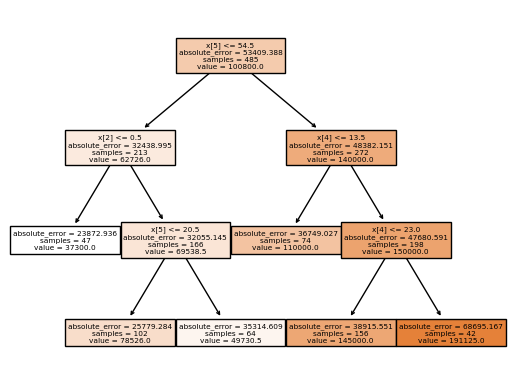

In [67]:
# Draw the tree
from sklearn import tree

tree.plot_tree(dt_regressor, filled=True)

In [68]:
# Graph illustrates how correlated the predicted and actual values are. Shows us where the model was good in predicting and where it wasn't

fig = px.density_heatmap(x=dt_regressor_y_predict, y=y_test.values, labels={'y':'Actual Value', 'x':'Predicted Value'})
fig.update_layout(height=600, width=800)
fig.show()